#### **Importimi i librarive*

In [2]:
#!pip install missingno

In [1]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import missingno as msno

#### Ngarkimi i datasetit

In [2]:
# Ngarkimi i datasetit nga csv file per analize.
dataset_kryesor = pd.read_csv('data/DatasetKryesor.csv', encoding='latin1')

#### Numrimi i rreshtave dhe atributeve ne dataset

In [3]:
# Dimensionet e dataset
dataset_kryesor.shape

(54161, 13)

#### Paraqitja e atributeve te dataset

In [4]:
# atributet e dataset
dataset_kryesor.columns

Index(['Spitali', 'NjesiaReparti', 'Numri', 'Shenim', 'DataRegjistrimit',
       'Artikulli', 'ArtikulliLloji', 'RrugaMarrjes', 'Sasia', 'Cmimi',
       'Vlera', 'OperatoriEkonomik', 'LlojiHyrjes'],
      dtype='object')

#### Rreshtat e pare te dataset

In [5]:
# Paraqitja e pese rreshtave te pare te dataset
dataset_kryesor.head()

,Spitali,NjesiaReparti,Numri,Shenim,DataRegjistrimit,Artikulli,ArtikulliLloji,RrugaMarrjes,Sasia,Cmimi,Vlera,OperatoriEkonomik,LlojiHyrjes
0,Spitali 4,Njesia e Gjinekologjisë me Obstetrikë,125/2024,Dalje,2024-01-23 00:00:00.000,B05XA03 - Natrium chloride 0.9%/500ml - Solut...,Barna,INTRAVENOUS USE,20.0,0.36,7.20,OE 5,Grant qeveritar
1,Spitali 4,Njesia e Gjinekologjisë me Obstetrikë,297/2024,Dalje,2024-02-16 00:00:00.000,B05XA03 - Natrium chloride 0.9%/500ml - Solut...,Barna,INTRAVENOUS USE,20.0,0.36,7.20,OE 5,Grant qeveritar
2,Spitali 4,Njesia e Gjinekologjisë me Obstetrikë,231/2024,Dalje,2024-02-06 00:00:00.000,G02AD06 - Misoprostol 200 mcg - Tabletë,Barna,//,42.0,0.28,11.76,OE 4,Grant qeveritar
3,Spitali 4,Njesia e Gjinekologjisë me Obstetrikë,538/2024,Dalje,2024-03-27 00:00:00.000,G02AD06 - Misoprostol 200 mcg - Tabletë,Barna,//,42.0,0.28,11.76,OE 4,Grant qeveritar
4,Spitali 4,Njesia e Gjinekologjisë me Obstetrikë,779/2024,Dalje,2024-05-02 00:00:00.000,S02BA06 - Dexamethasone 4mg/ml - Ampullë,Barna,INTRAMUSCULAR AND INTRAVENOUS USE,10.0,0.09,0.90,OE 28,Grant qeveritar


### Tipet e te dhenave per atribute

In [6]:
# Tipet e te dhenave
dataset_kryesor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54161 entries, 0 to 54160
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Spitali            54161 non-null  object 
 1   NjesiaReparti      54161 non-null  object 
 2   Numri              54161 non-null  object 
 3   Shenim             54161 non-null  object 
 4   DataRegjistrimit   54161 non-null  object 
 5   Artikulli          54160 non-null  object 
 6   ArtikulliLloji     54161 non-null  object 
 7   RrugaMarrjes       54161 non-null  object 
 8   Sasia              54128 non-null  float64
 9   Cmimi              54128 non-null  float64
 10  Vlera              54131 non-null  float64
 11  OperatoriEkonomik  54161 non-null  object 
 12  LlojiHyrjes        54161 non-null  object 
dtypes: float64(3), object(10)
memory usage: 5.4+ MB


#### Paraqitja e kolonave me Vlerat NULL

In [7]:
# Checking for missing data in all columns
missing_data = dataset_kryesor.isnull().sum()

print("Missing data in each column:")
print(missing_data)

Missing data in each column:
Spitali               0
NjesiaReparti         0
Numri                 0
Shenim                0
DataRegjistrimit      0
Artikulli             1
ArtikulliLloji        0
RrugaMarrjes          0
Sasia                33
Cmimi                33
Vlera                30
OperatoriEkonomik     0
LlojiHyrjes           0
dtype: int64


### Kontrollimi i vlerave unike për secilin atribut (shumë e dobishme për variabla kategorike)

In [8]:
for col in dataset_kryesor.columns:
    unique_values = dataset_kryesor[col].nunique()
    print(f'Atributi "{col}" ka {unique_values} vlera unike.')

Atributi "Spitali" ka 8 vlera unike.
Atributi "NjesiaReparti" ka 36 vlera unike.
Atributi "Numri" ka 5622 vlera unike.
Atributi "Shenim" ka 169 vlera unike.
Atributi "DataRegjistrimit" ka 274 vlera unike.
Atributi "Artikulli" ka 1063 vlera unike.
Atributi "ArtikulliLloji" ka 3 vlera unike.
Atributi "RrugaMarrjes" ka 22 vlera unike.
Atributi "Sasia" ka 1138 vlera unike.
Atributi "Cmimi" ka 883 vlera unike.
Atributi "Vlera" ka 5338 vlera unike.
Atributi "OperatoriEkonomik" ka 67 vlera unike.
Atributi "LlojiHyrjes" ka 5 vlera unike.


### Shikimi i statistikave për kolonat numerike (me .describe())

In [9]:
print("Statistikat për kolonat kategorike:")
print(dataset_kryesor.describe(include=['O']))  # 'O' qëndron për 'Object' (teksti)

Statistikat për kolonat kategorike:
          Spitali        NjesiaReparti      Numri Shenim  \
count       54161                54161      54161  54161   
unique          8                   36       5622    169   
top     Spitali 1  Njesia e Kirurgjisë  1512/2024  Dalje   
freq        14888                 7304         78  52251   

               DataRegjistrimit  \
count                     54161   
unique                      274   
top     2024-12-26 00:00:00.000   
freq                        392   

                                                Artikulli ArtikulliLloji  \
count                                               54160          54161   
unique                                               1063              3   
top     B05XA03 - Natrium chloride  0.9%/100ml - Solut...          Barna   
freq                                                 1806          50085   

       RrugaMarrjes OperatoriEkonomik      LlojiHyrjes  
count         54161             54161            

### Identifikimi i kolonave kategorike dhe numerike (automatikisht)

In [10]:
kategorike = dataset_kryesor.select_dtypes(include=['object']).columns
numerike = dataset_kryesor.select_dtypes(include=['int64', 'float64']).columns

print("Kolonat kategorike:", kategorike)
print("Kolonat numerike:", numerike)

Kolonat kategorike: Index(['Spitali', 'NjesiaReparti', 'Numri', 'Shenim', 'DataRegjistrimit',
       'Artikulli', 'ArtikulliLloji', 'RrugaMarrjes', 'OperatoriEkonomik',
       'LlojiHyrjes'],
      dtype='object')
Kolonat numerike: Index(['Sasia', 'Cmimi', 'Vlera'], dtype='object')


### Analiza e shpërndarjes për kolonën "Spitali"

In [11]:
dataset_kryesor['Spitali'].value_counts().sort_index()

Spitali
Spitali 1    14888
Spitali 2     3252
Spitali 3     8316
Spitali 4    10018
Spitali 5     1782
Spitali 6     4379
Spitali 7    10002
Spitali 8     1524
Name: count, dtype: int64

#### Analiza e shpërndarjes për kolonën "NjesiaReparti"

In [12]:
dataset_kryesor['NjesiaReparti'].value_counts().sort_index()

NjesiaReparti
Njesia e Alergologjisë dhe Imunologjisë             95
Njesia e Ambulancës Specialistike                  208
Njesia e Anestezeologjisë                         1687
Njesia e Anesteziologjisë dhe Emergjencës         1503
Njesia e Biokimisë Mjekësore                      1281
Njesia e Dermatologjisë                            123
Njesia e Emergjencës                              5531
Njesia e Fizioterapisë                              26
Njesia e Gjinekologjisë me Obstetrikë             4275
Njesia e Hemodializës                             2067
Njesia e Infektivës                               1925
Njesia e Internos                                 6785
Njesia e Kirurgjisë                               7304
Njesia e Kujdesit Intenziv                        3454
Njesia e Mjekësisë Nukleare                        124
Njesia e Mjekësisë së Punës                         13
Njesia e Neonatologjisë                            943
Njesia e Neurologjisë                             1

#### Analiza e shpërndarjes për kolonën "Artikulli"

In [13]:
dataset_kryesor['Artikulli'].value_counts()

Artikulli
B05XA03 - Natrium chloride  0.9%/100ml - Solution for infusion                                                              1806
B05AA01 - Human Albumin 20%/50ml - Solution for infusion                                                                    1710
B05XA03 - Natrium chloride  0.9% 500 ml izotonik - Solution for infusion                                                    1600
J01DD04 - ceftriaxone 1g - Pluhur për injeksion                                                                             1564
B01AB - Enoxaparin 40mg/0.4ml - Injeksion                                                                                   1402
                                                                                                                            ... 
RG665 - Assay dilution cups for Vidas 3 44 pcs - Other                                                                         1
RG39 - LDH 6X24+4X9ml - Kit                                                            

#### Analiza e shpërndarjes për kolonën "ArtikulliLloji"

In [14]:
dataset_kryesor['ArtikulliLloji'].value_counts()

ArtikulliLloji
Barna          50085
Reagenc         2613
Citostatikë     1463
Name: count, dtype: int64

#### Analiza e shpërndarjes për kolonën "OperatoriEkonomik"

In [15]:
dataset_kryesor['OperatoriEkonomik'].value_counts()

OperatoriEkonomik
OE 5     7842
OE 6     5323
OE 64    5254
OE 28    4180
OE 8     3598
         ... 
OE 33      10
OE 15       8
OE 65       8
OE 27       7
OE 67       1
Name: count, Length: 67, dtype: int64

#### Analiza e shpërndarjes për kolonën "LlojiHyrjes"

In [16]:
dataset_kryesor['LlojiHyrjes'].value_counts()

LlojiHyrjes
Grant qeveritar           49952
Hyrje vetanake             2184
Hyrje Vetanake              699
Para te gatshme (Cash)      694
Donacion                    632
Name: count, dtype: int64

#### Konvertimi i Dates se regjistrimit ne format datetime short

In [17]:
dataset_kryesor['DataRegjistrimit'] = pd.to_datetime(dataset_kryesor['DataRegjistrimit'])
current_date = datetime(2024, 1, 1)
print(dataset_kryesor[['DataRegjistrimit']])

      DataRegjistrimit
0           2024-01-23
1           2024-02-16
2           2024-02-06
3           2024-03-27
4           2024-05-02
...                ...
54156       2024-08-02
54157       2024-09-16
54158       2024-08-23
54159       2024-09-16
54160       2024-08-23

[54161 rows x 1 columns]


### Kontrollimi i vlerave të pazakonta (outliers) për kolonat numerike (me boxplot)

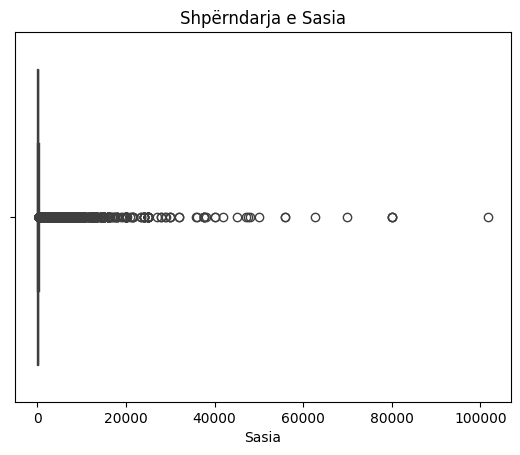

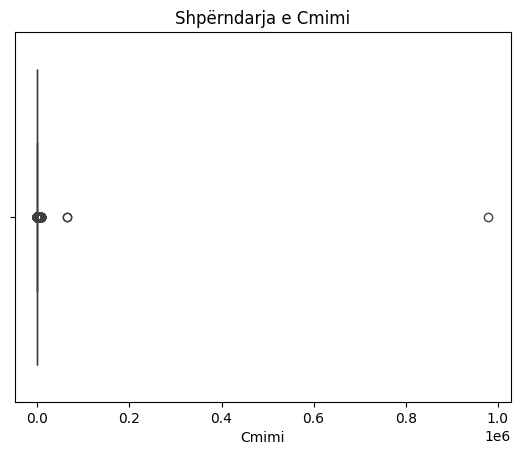

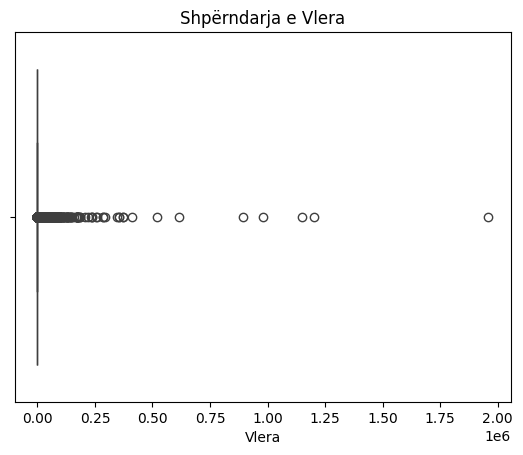

In [18]:
for col in numerike:
    plt.figure()
    sns.boxplot(x=dataset_kryesor[col])
    plt.title(f'Shpërndarja e {col}')
    plt.show()


#### Fshirja e rreshtave me NULL te kolona Artikulli

In [ ]:
datasets = {
    'dataset_kryesor': dataset_kryesor
}

# Emrat e kolonave të ID-ve për çdo dataset
id_columns = {
    'dataset_kryesor': 'Artikulli'
}

for name, df in datasets.items():
    id_col = id_columns[name]
    # Fshij rreshtat me null
    cleaned_df = df[(df[id_col] != 0) & (df[id_col].notnull())]
    datasets[name] = cleaned_df

# Tani mund të aksesosh datasetet e pastra
dataset_kryesor = datasets['dataset_kryesor']

display(dataset_kryesor)

dataset_kryesor.shape

(54128, 13)

#### Fshirja e rreshtave me NULL te kolona Sasia, Çmimi dhe Vlera

In [33]:
# Emrat e kolonave që duhet të jenë jo-null
columns_to_check = ['Sasia', 'Cmimi', 'Vlera']

# Fshij rreshtat që kanë vlera NULL në ndonjë nga kolonat e listuara
dataset_kryesor = dataset_kryesor.dropna(subset=columns_to_check)

# Shfaq datasetin e pastruar
display(dataset_kryesor)


,Spitali,NjesiaReparti,Numri,Shenim,DataRegjistrimit,Artikulli,ArtikulliLloji,RrugaMarrjes,Sasia,Cmimi,Vlera,OperatoriEkonomik,LlojiHyrjes
0,Spitali 4,Njesia e Gjinekologjisë me Obstetrikë,125/2024,Dalje,2024-01-23,B05XA03 - Natrium chloride 0.9%/500ml - Solut...,Barna,INTRAVENOUS USE,20.0,0.36,7.20,OE 5,Grant qeveritar
1,Spitali 4,Njesia e Gjinekologjisë me Obstetrikë,297/2024,Dalje,2024-02-16,B05XA03 - Natrium chloride 0.9%/500ml - Solut...,Barna,INTRAVENOUS USE,20.0,0.36,7.20,OE 5,Grant qeveritar
2,Spitali 4,Njesia e Gjinekologjisë me Obstetrikë,231/2024,Dalje,2024-02-06,G02AD06 - Misoprostol 200 mcg - Tabletë,Barna,//,42.0,0.28,11.76,OE 4,Grant qeveritar
3,Spitali 4,Njesia e Gjinekologjisë me Obstetrikë,538/2024,Dalje,2024-03-27,G02AD06 - Misoprostol 200 mcg - Tabletë,Barna,//,42.0,0.28,11.76,OE 4,Grant qeveritar
4,Spitali 4,Njesia e Gjinekologjisë me Obstetrikë,779/2024,Dalje,2024-05-02,S02BA06 - Dexamethasone 4mg/ml - Ampullë,Barna,INTRAMUSCULAR AND INTRAVENOUS USE,10.0,0.09,0.90,OE 28,Grant qeveritar
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54156,Spitali 3,Njesia e Shëndetit Mendor,1598/2024,Dalje,2024-08-02,N06AB10 - Escitalopram 5mg - Format e forta orale,Barna,//,713.0,0.12,85.56,OE 63,Grant qeveritar
54157,Spitali 3,Njesia e Gjinekologjisë me Obstetrikë,2041/2024,Dalje,2024-09-16,D08AG02 - Povidon Jod 10% - Solution,Barna,Extern,24.0,3.39,81.36,OE 53,Grant qeveritar
54158,Spitali 3,Njesia e Gjinekologjisë me Obstetrikë,1820/2024,Dalje,2024-08-23,D08AG02 - Povidon Jod 10% - Solution,Barna,Extern,24.0,3.39,81.36,OE 53,Grant qeveritar
54159,Spitali 3,Njesia e Gjinekologjisë me Obstetrikë,2041/2024,Dalje,2024-09-16,B05XA03 - Natrium chloride 0.9% 500 ml izoton...,Barna,INTRAVENOUS USE,200.0,0.51,102.00,OE 5,Grant qeveritar


#### Reduktimi i dimensionalitetit të dataset_kryesor me largimin e kolonave që nuk duhen për analizë të mëtejshme.

In [ ]:
# atributet qe do te largohen nga dataset
kolonat_per_fshirje = ['Numri','Shenim','DataRegjistrimit', 'RrugaMarrjes'
                   ]
dataset_kryesor= dataset_kryesor.drop(columns=kolonat_per_fshirje,axis=1)
dataset_kryesor.head()
# display(dataset_kryesor)

,Spitali,NjesiaReparti,Artikulli,ArtikulliLloji,Sasia,Cmimi,Vlera,OperatoriEkonomik,LlojiHyrjes,Z_Score
0,Spitali 4,Njesia e Gjinekologjisë me Obstetrikë,B05XA03 - Natrium chloride 0.9%/500ml - Solut...,Barna,20.0,0.36,7.20,OE 5,Grant qeveritar,0.059216
1,Spitali 4,Njesia e Gjinekologjisë me Obstetrikë,B05XA03 - Natrium chloride 0.9%/500ml - Solut...,Barna,20.0,0.36,7.20,OE 5,Grant qeveritar,0.059216
2,Spitali 4,Njesia e Gjinekologjisë me Obstetrikë,G02AD06 - Misoprostol 200 mcg - Tabletë,Barna,42.0,0.28,11.76,OE 4,Grant qeveritar,0.058912
3,Spitali 4,Njesia e Gjinekologjisë me Obstetrikë,G02AD06 - Misoprostol 200 mcg - Tabletë,Barna,42.0,0.28,11.76,OE 4,Grant qeveritar,0.058912
4,Spitali 4,Njesia e Gjinekologjisë me Obstetrikë,S02BA06 - Dexamethasone 4mg/ml - Ampullë,Barna,10.0,0.09,0.90,OE 28,Grant qeveritar,0.059635


#### Paraqitja e dataset kryesor pas ndryshimit ne renditje te kolonave

In [47]:
# Caktimi i renditjes së kolonave në dataset
column_order = ['Spitali','NjesiaReparti','LlojiHyrjes','OperatoriEkonomik','ArtikulliLloji','Artikulli', 'Sasia','Cmimi','Vlera']
# Riorganizon dataset-in sipas renditjes së përcaktuar të kolonave
dataset_kryesor = dataset_kryesor[column_order]
# Shfaq disa rreshta për të parë ndryshimet
dataset_kryesor.head()

,Spitali,NjesiaReparti,LlojiHyrjes,OperatoriEkonomik,ArtikulliLloji,Artikulli,Sasia,Cmimi,Vlera
0,Spitali 4,Njesia e Gjinekologjisë me Obstetrikë,Grant qeveritar,OE 5,Barna,B05XA03 - Natrium chloride 0.9%/500ml - Solut...,20.0,0.36,7.20
1,Spitali 4,Njesia e Gjinekologjisë me Obstetrikë,Grant qeveritar,OE 5,Barna,B05XA03 - Natrium chloride 0.9%/500ml - Solut...,20.0,0.36,7.20
2,Spitali 4,Njesia e Gjinekologjisë me Obstetrikë,Grant qeveritar,OE 4,Barna,G02AD06 - Misoprostol 200 mcg - Tabletë,42.0,0.28,11.76
3,Spitali 4,Njesia e Gjinekologjisë me Obstetrikë,Grant qeveritar,OE 4,Barna,G02AD06 - Misoprostol 200 mcg - Tabletë,42.0,0.28,11.76
4,Spitali 4,Njesia e Gjinekologjisë me Obstetrikë,Grant qeveritar,OE 28,Barna,S02BA06 - Dexamethasone 4mg/ml - Ampullë,10.0,0.09,0.90


### Heatmap i Korelacionit (për lidhjet mes kolonave numerike)

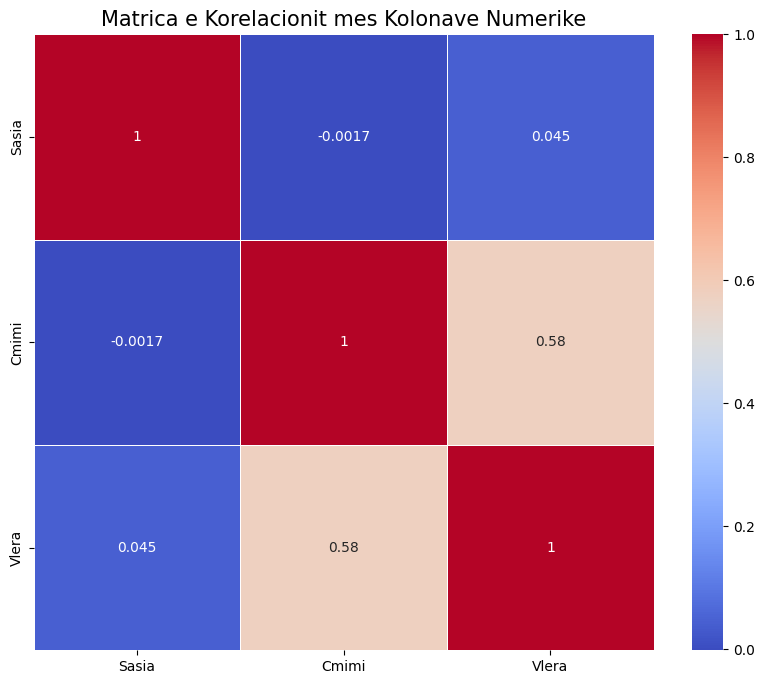

In [38]:

plt.figure(figsize=(10, 8))
sns.heatmap(dataset_kryesor.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrica e Korelacionit mes Kolonave Numerike', fontsize=15)
plt.show()


### Boxplot për të parë Outliers për çdo kolonë numerike

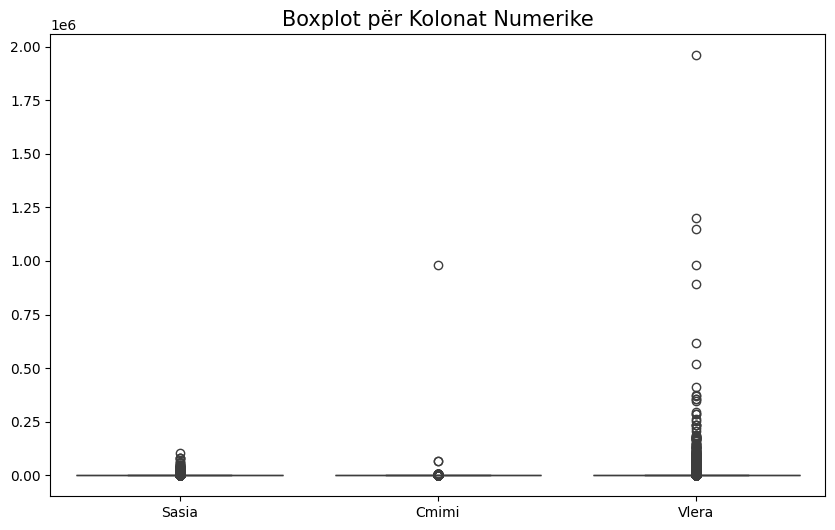

In [43]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset_kryesor[['Sasia', 'Cmimi', 'Vlera']])
plt.title('Boxplot për Kolonat Numerike', fontsize=15)
plt.show()


### Grafiku kohor për 'DataRegjistrimit' nëse do trendin në kohë

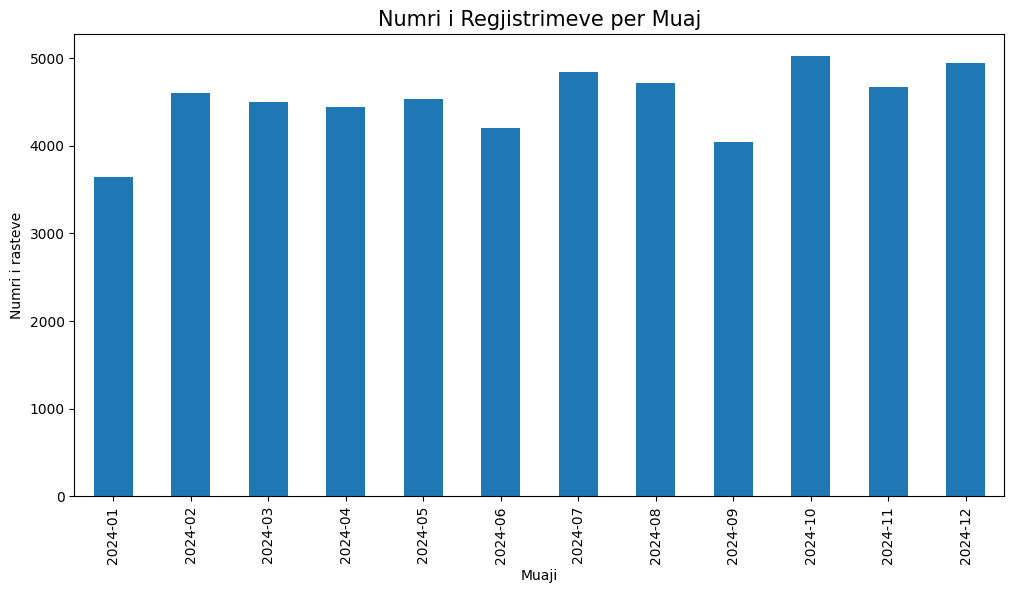

In [44]:
dataset_kryesor['DataRegjistrimit'] = pd.to_datetime(dataset_kryesor['DataRegjistrimit'])

# Numri i regjistrimeve në muaj
dataset_kryesor.groupby(dataset_kryesor['DataRegjistrimit'].dt.to_period('M')).size().plot(kind='bar', figsize=(12, 6))
plt.title('Numri i Regjistrimeve per Muaj', fontsize=15)
plt.ylabel('Numri i rasteve')
plt.xlabel('Muaji')
plt.show()
